In [124]:
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

original = cv2.imread(
    "/home/dmacs/Desktop/MTech/104P/Test3/basket.png", cv2.IMREAD_GRAYSCALE
)

# Read the noisy image
noisy_image = cv2.imread(
    "/home/dmacs/Desktop/MTech/104P/Test3/basket_noisy.png", cv2.IMREAD_COLOR
)


(-0.5, 511.5, 511.5, -0.5)

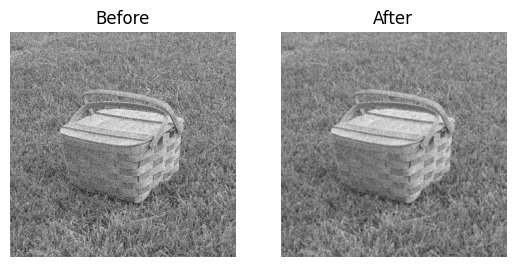

In [147]:
#Using Gaussian Blur function
gaussian = cv2.GaussianBlur(noisy_image, (3, 3), 0)

cv2.imwrite('gaussian.png', gaussian)

plt.subplot(121)
plt.imshow(noisy_image, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(122)
plt.imshow(gaussian, cmap="gray")
plt.title("After")
plt.axis("off")


(-0.5, 511.5, 511.5, -0.5)

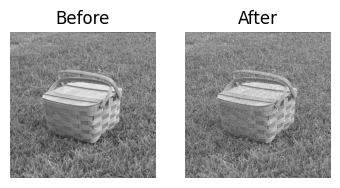

In [146]:
noiseless_image_bw = cv2.fastNlMeansDenoising(noisy_image, 15, 7, 21)
cv2.imwrite('fastNlMeansDenoising.png', noiseless_image_bw)

plt.subplot(131)
plt.imshow(original, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(132)
plt.imshow(noiseless_image_bw, cmap="gray")
plt.title("After")
plt.axis("off")


(-0.5, 511.5, 511.5, -0.5)

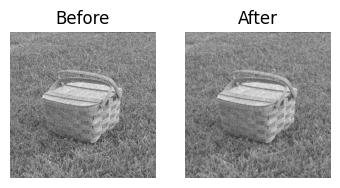

In [145]:
#applying the median Filter
median = cv2.medianBlur(noisy_image, 3)
cv2.imwrite('median.png', median)

plt.subplot(131)
plt.imshow(noisy_image, cmap="gray")
plt.title("Before")
plt.axis("off")

plt.subplot(132)
plt.imshow(median, cmap="gray")
plt.title("After")
plt.axis("off")


(-0.5, 511.5, 511.5, -0.5)

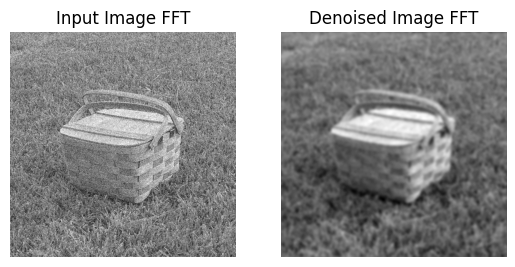

In [155]:
#solving using gaussian FFT

#defining the gaussian filter
def gaussianfilter(M, N, D0, n = None):
    # using numpy meshgrid to create U and V arrays(the spatial frequency components.)
    U, V = np.meshgrid(np.arange(N), np.arange(M))
    #finding the distances D(U, V)
    D = np.hypot(U - M/2, V - N/2)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    return H

f = cv2.imread('/home/dmacs/Desktop/MTech/104P/Test3/basket_noisy.png',cv2.IMREAD_GRAYSCALE)
M, N = f.shape # getting image size

D0 = 3
ILPF = gaussianfilter(M, N, D0)
filtered_image = n.ifftshift(n.ifft2(n.fft2(f) * n.fft2(ILPF)))
# cv2.imwrite('fft.png', filtered_image)

plt.subplot(121)
plt.imshow(f, cmap = 'gray')
plt.title('Input Image FFT')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.abs(filtered_image), cmap = 'gray')
plt.title('Denoised Image FFT')
plt.axis('off')